In [11]:
import numpy as np
import sklearn as sk
from sklearn.datasets import load_iris
from sklearn import model_selection
from matplotlib import pyplot as plt
import importlib
rf = importlib.import_module("random-forests")

iris = load_iris()

In [12]:
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)
X_train.shape, X_test.shape

((112, 4), (38, 4))

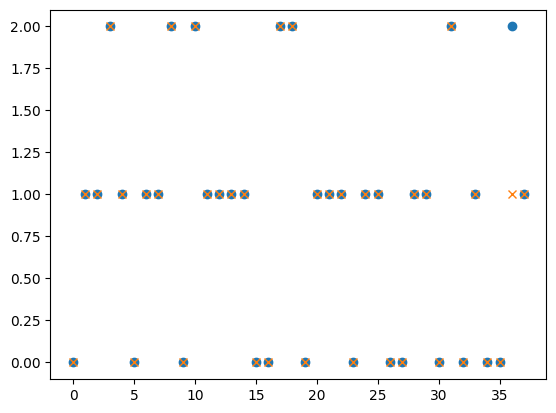

In [13]:
# Test on continuous data.
decision_tree = rf.DecisionTree(max_depth=10, min_leaf_size=1, n_candidates=10, criterion='gini')
decision_tree.fit(X_train, y_train, feature_type="continuous")
y_predicted = decision_tree.predict(X_test)


# Plot.
xs = [i for i in range(len(y_test))]
fig = plt.figure(1)
plt.plot(xs, y_test, 'o')
plt.plot(xs, y_predicted, 'x')

In [14]:
W = np.array(X, dtype=object)
cat = ["s" for _ in range(X.shape[0])]  # A col of categorical data.
for i in range(X.shape[0]):
    if X[i, 3] <= 0.8:
        cat[i] = "a"
    elif 0.8 < X[i, 3] <= 1.6:
        cat[i] = "b"
    elif X[i, 3] > 1.6:
        cat[i] = "c"
W[:, 3] = cat
W_train, W_test, z_train, z_test = model_selection.train_test_split(W, y)

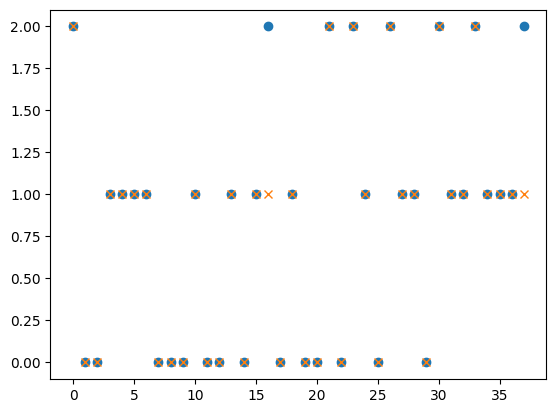

In [15]:
# Test on categorical data.
decision_tree2 = rf.DecisionTree(max_depth=10, min_leaf_size=1, n_candidates=10, criterion='gini')
decision_tree2.fit(W_train, z_train, feature_type=[0, 0, 0, 1])
z_predicted = decision_tree2.predict(W_test)


# Plot.
xs = [i for i in range(len(z_test))]
fig = plt.figure(1)
plt.plot(xs, z_test, 'o')
plt.plot(xs, z_predicted, 'x')

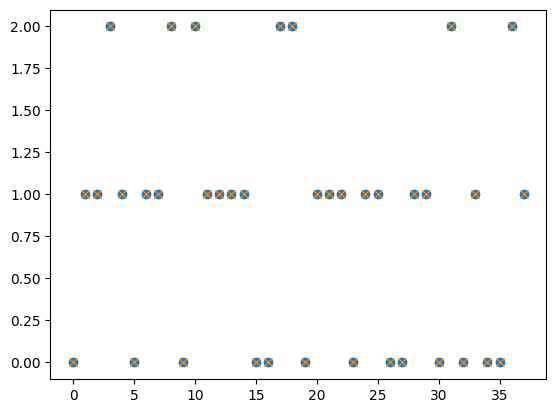

In [16]:
# Test on RandomForest
random_forest = rf.RandomForest(n_trees=10, max_depth=100, min_leaf_size=1, n_candidates=2, criterion="gini")
random_forest.fit(X_train, y_train, feature_type="continuous", m_features=2)
y_predicted = random_forest.predict(X_test)


# Plot.
xs = [i for i in range(len(y_test))]
fig = plt.figure(1)
plt.plot(xs, y_test, 'o')
plt.plot(xs, y_predicted, 'x')